<a href="https://colab.research.google.com/github/sruthireddy1482/CE888/blob/main/Assignment2/London_police_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/sruthireddy1482/CE888/main/London-stopandserach.csv")
df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-07-01T02:16:55+00:00,NaN,NaN,51.517196,-0.085149,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
1,Person search,2020-07-01T02:16:55+00:00,NaN,NaN,51.517196,-0.085149,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
2,Person and Vehicle search,2020-07-01T03:10:05+00:00,NaN,NaN,51.512117,-0.102411,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False
3,Person and Vehicle search,2020-07-01T03:10:05+00:00,NaN,NaN,51.512117,-0.102411,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False
4,Person search,2020-07-01T03:16:33+00:00,NaN,NaN,51.512117,-0.102411,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False


In [ ]:
df1=df.drop(['Part of a policing operation', 'Policing operation','Date','Latitude','Longitude','Age range'], axis=1)
df1.head()

,Type,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,Male,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
1,Person search,Male,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
2,Person and Vehicle search,Female,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False
3,Person and Vehicle search,Female,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False
4,Person search,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False


In [ ]:
table2 = pd.crosstab(index=df1['Removal of more than just outer clothing'], 
                          columns=df1["Gender"])
table2



Gender,Female,Male
Removal of more than just outer clothing,,
False,195,1618
True,3,45


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Type                                      1861 non-null   object
 1   Gender                                    1861 non-null   object
 2   Self-defined ethnicity                    1761 non-null   object
 3   Officer-defined ethnicity                 1759 non-null   object
 4   Legislation                               1861 non-null   object
 5   Object of search                          1852 non-null   object
 6   Outcome                                   1861 non-null   object
 7   Outcome linked to object of search        1861 non-null   bool  
 8   Removal of more than just outer clothing  1861 non-null   bool  
dtypes: bool(2), object(7)
memory usage: 105.5+ KB


In [ ]:
table1 = pd.crosstab(index=df1["Outcome"], 
                          columns=df1["Gender"])

table1

Gender,Female,Male
Outcome,,
A no further action disposal,150,1247
Arrest,29,277
Caution (simple or conditional),2,4
Community resolution,4,6
Khat or Cannabis warning,12,111
Penalty Notice for Disorder,1,7
Summons / charged by post,0,11


In [ ]:
table1['Male']

Outcome
A no further action disposal       1247
Arrest                              277
Caution (simple or conditional)       4
Community resolution                  6
Khat or Cannabis warning            111
Penalty Notice for Disorder           7
Summons / charged by post            11
Name: Male, dtype: int64

In [ ]:
df1.columns

Index(['Type', 'Gender', 'Self-defined ethnicity', 'Officer-defined ethnicity',
       'Legislation', 'Object of search', 'Outcome',
       'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [ ]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 

cols = ['Outcome','Gender','Type','Legislation','Outcome linked to object of search',
        'Removal of more than just outer clothing','Self-defined ethnicity','Officer-defined ethnicity','Object of search']
df1[cols] = df[cols].astype(str)



df1[cols] = df1[cols].apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
df1.head()

,Type,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,1,1,13,3,1,2,0,0,0
1,1,1,13,3,1,2,0,0,0
2,0,0,15,3,1,2,1,1,0
3,0,0,15,3,1,2,1,1,0
4,1,1,15,3,1,2,1,1,0


In [ ]:
df1['Removal of more than just outer clothing'].value_counts()

0    1813
1      48
Name: Removal of more than just outer clothing, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Type                                      1861 non-null   int32
 1   Gender                                    1861 non-null   int32
 2   Self-defined ethnicity                    1861 non-null   int32
 3   Officer-defined ethnicity                 1861 non-null   int32
 4   Legislation                               1861 non-null   int32
 5   Object of search                          1861 non-null   int32
 6   Outcome                                   1861 non-null   int32
 7   Outcome linked to object of search        1861 non-null   int32
 8   Removal of more than just outer clothing  1861 non-null   int32
dtypes: int32(9)
memory usage: 65.6 KB


In [ ]:
cols = ['Legislation','Self-defined ethnicity','Officer-defined ethnicity','Object of search']
from sklearn.preprocessing import OneHotEncoder
ohe_arr = OneHotEncoder().fit_transform(df1[cols]).toarray()

In [ ]:
ohe_arr

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
data_hot_encoded = pd.DataFrame(ohe_arr, index=df1.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df1.drop(columns=cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
data_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   0                                         1861 non-null   float64
 1   1                                         1861 non-null   float64
 2   2                                         1861 non-null   float64
 3   3                                         1861 non-null   float64
 4   4                                         1861 non-null   float64
 5   5                                         1861 non-null   float64
 6   6                                         1861 non-null   float64
 7   7                                         1861 non-null   float64
 8   8                                         1861 non-null   float64
 9   9                                         1861 non-null   float64
 10  10                                  

In [ ]:
data_out.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,Type,Gender,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0


In [ ]:
data_final = data_out.drop(columns=['Outcome'],axis=1)
data_final.shape

(1861, 40)

In [ ]:
data_out.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,Type,Gender,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0


In [ ]:
target = data_out['Outcome']
target.shape

(1861,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_final,target,test_size=0.75,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[973,  61,   0,   0,  16,   0,   0],
       [ 49, 161,   0,   0,  24,   0,   0],
       [  2,   3,   0,   0,   0,   0,   0],
       [  1,   5,   0,   0,   0,   0,   0],
       [ 24,  24,   0,   0,  42,   0,   0],
       [  1,   3,   0,   0,   0,   0,   0],
       [  0,   4,   0,   0,   3,   0,   0]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8424068767908309

In [ ]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("confusion matrix, without normalization")
  print(cm)
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

confusion matrix, without normalization
[[973  61   0   0  16   0   0]
 [ 49 161   0   0  24   0   0]
 [  2   3   0   0   0   0   0]
 [  1   5   0   0   0   0   0]
 [ 24  24   0   0  42   0   0]
 [  1   3   0   0   0   0   0]
 [  0   4   0   0   3   0   0]]


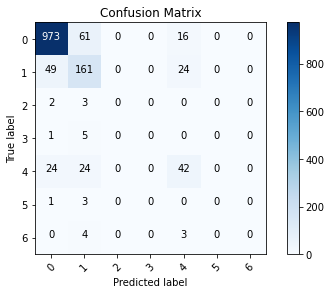

In [ ]:
cm_plot_labels=[0,1,2,3,4,5,6]
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

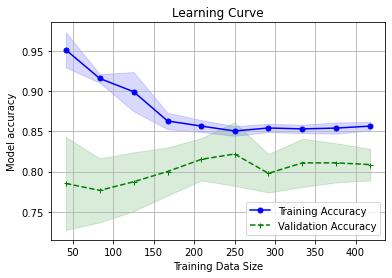

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=LogisticRegression(), X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['0','1','2','3','4','5','6'])

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1050
           1       0.62      0.69      0.65       234
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         6
           4       0.49      0.47      0.48        90
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         7

    accuracy                           0.84      1396
   macro avg       0.29      0.30      0.29      1396
weighted avg       0.83      0.84      0.84      1396



In [ ]:
df['Outcome'].value_counts()

A no further action disposal       1397
Arrest                              306
Khat or Cannabis warning            123
Summons / charged by post            11
Community resolution                 10
Penalty Notice for Disorder           8
Caution (simple or conditional)       6
Name: Outcome, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8237822349570201

confusion matrix, without normalization
[[967  61   1   3  17   0   1]
 [ 55 143   2   9  15   0  10]
 [  2   3   0   0   0   0   0]
 [  1   2   0   3   0   0   0]
 [ 17  36   3   0  34   0   0]
 [  2   1   0   0   1   0   0]
 [  2   1   0   0   1   0   3]]


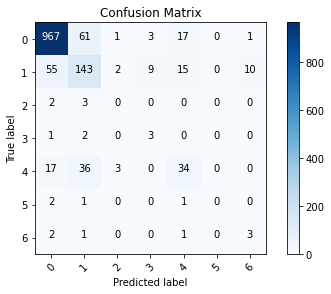

In [ ]:
cm_plot_labels=[0,1,2,3,4,5,6]
cm = confusion_matrix(y_test, y_pred)
cm
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

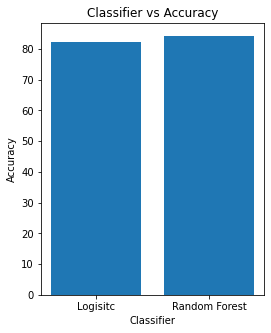

In [ ]:
plt.figure(figsize=(4,5))
plt.bar(x=['Logisitc','Random Forest'],height=[82.37,84.20])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier vs Accuracy')
plt.show()